In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import gradio as gr
# !pip install transformers //download it
# pip install --upgrade transformers// update it if you get error
# !pip install gradio // download it
# Fetch the 20 newsgroups dataset

data = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
print("First few rows of the dataset:")
print(data.data[:2])  

First few rows of the dataset:
["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n", 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra

In [4]:
# Display information about the dataset
print("Number of samples:", len(data.data))
print("\nTarget names:", data.target_names)

Number of samples: 18846

Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1, random_state=1)
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'comp.windows.x','misc.forsale', 'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt' ,'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns','talk.politics.mideast', 'talk.politics.misc','talk.religion.misc']
# Training the data on these categories
train = fetch_20newsgroups (subset='train', categories=categories)


In [6]:
#MultinomialNaiveBayes functon
class MultinomialNaiveBayes:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        num_features = X.shape[1]

        # Calculate class probabilities
        self.class_probs = np.zeros(num_classes)
        for i in range(num_classes):
            self.class_probs[i] = np.sum(y == i) / len(y)

        # Calculate feature probabilities
        self.feature_probs = np.zeros((num_classes, num_features))
        for i in range(num_classes):
            class_count = np.sum(y == i)
            self.feature_probs[i, :] = (np.sum(X[y == i], axis=0) + self.alpha) / (class_count + self.alpha * num_features)

    def predict(self, X):
        num_samples = X.shape[0]
        num_classes = len(self.class_probs)
        predictions = np.zeros(num_samples, dtype=int)

        for i in range(num_samples):
            # Ensure X[i] is a 2D array with a single row
            sample_probs = np.sum(np.log(self.feature_probs) * X[i, :].toarray(), axis=1) + np.log(self.class_probs)
            predictions[i] = np.argmax(sample_probs)

        return predictions

In [7]:
# Define a list of classifiers to try
classifiers = [
    MultinomialNaiveBayes(alpha=.01),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression()
]


Classifier: MultinomialNaiveBayes
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83        78
           1       0.89      0.84      0.87       101
           2       0.88      0.70      0.78        96
           3       0.80      0.89      0.84       110
           4       0.94      0.74      0.83       101
           5       0.95      0.87      0.91       101
           6       0.94      0.81      0.87        93
           7       0.88      0.90      0.89       109
           8       0.95      0.84      0.89       103
           9       0.99      0.88      0.93       101
          10       0.69      0.97      0.81       110
          11       0.80      0.83      0.81       104
          12       0.89      0.86      0.88        79
          13       0.92      0.87      0.89        90
          14       0.87      0.94      0.90       101
          15       0.63      0.99      0.77       110
       

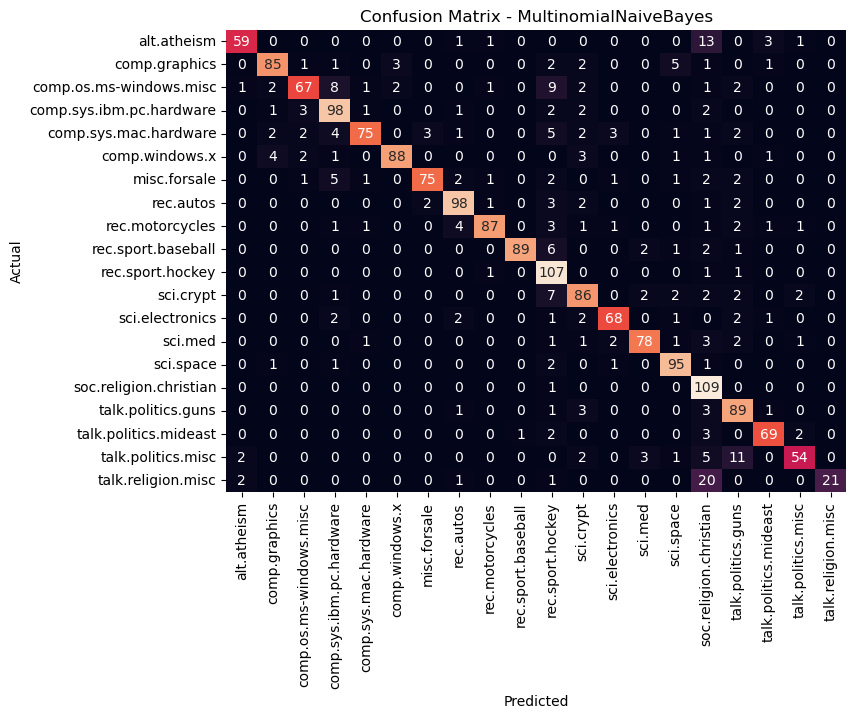






Classifier: RandomForestClassifier
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.36      0.51        78
           1       0.55      0.76      0.64       101
           2       0.39      0.72      0.51        96
           3       0.69      0.75      0.72       110
           4       0.79      0.65      0.71       101
           5       0.57      0.82      0.67       101
           6       0.44      0.92      0.60        93
           7       0.85      0.61      0.71       109
           8       0.94      0.63      0.76       103
           9       0.77      0.71      0.74       101
          10       0.89      0.79      0.84       110
          11       0.95      0.57      0.71       104
          12       0.55      0.54      0.55        79
          13       0.78      0.79      0.78        90
          14       0.95      0.72      0.82       101
          15       0.61      0.90      0.73       110
  

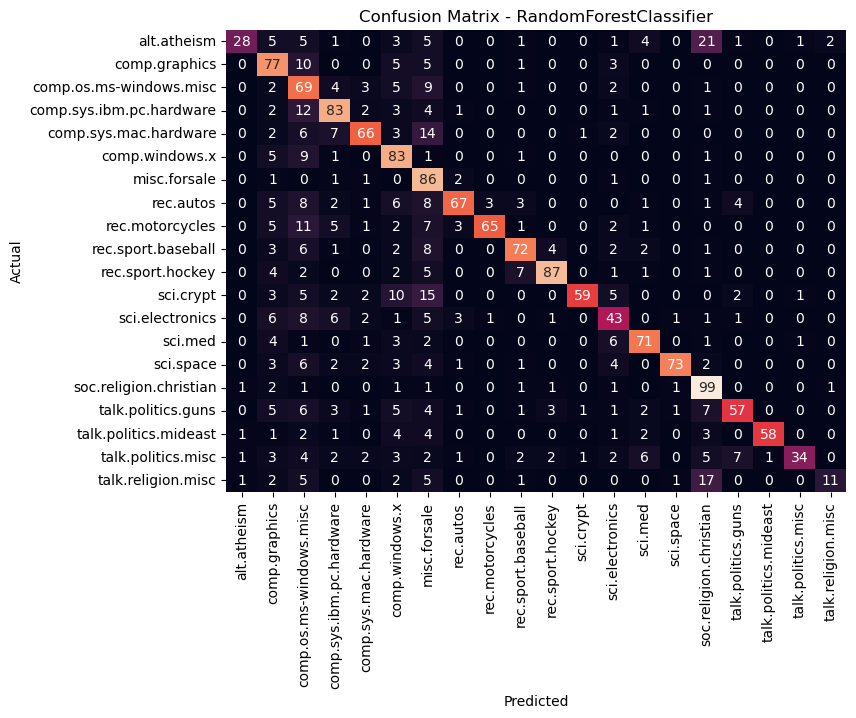






Classifier: SVC
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        78
           1       0.63      0.89      0.74       101
           2       0.82      0.72      0.77        96
           3       0.79      0.85      0.82       110
           4       0.87      0.67      0.76       101
           5       0.88      0.78      0.83       101
           6       0.46      0.89      0.60        93
           7       0.75      0.77      0.76       109
           8       0.92      0.71      0.80       103
           9       0.85      0.79      0.82       101
          10       1.00      0.82      0.90       110
          11       0.98      0.62      0.76       104
          12       0.39      0.90      0.54        79
          13       0.78      0.87      0.82        90
          14       0.98      0.78      0.87       101
          15       0.77      0.93      0.84       110
          16       0.

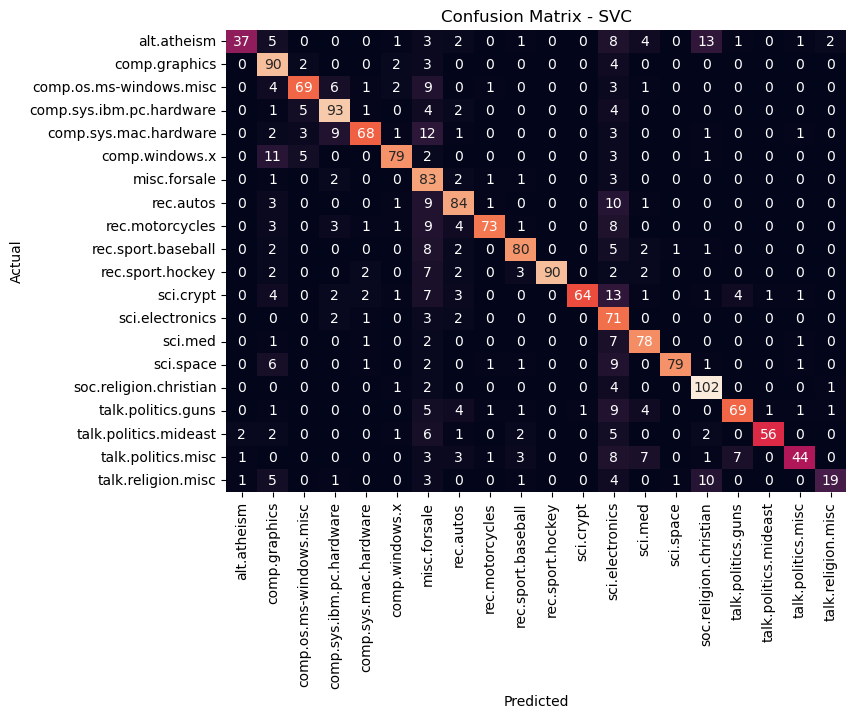






Classifier: LogisticRegression
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.51      0.63        78
           1       0.69      0.83      0.76       101
           2       0.70      0.70      0.70        96
           3       0.75      0.78      0.76       110
           4       0.88      0.72      0.79       101
           5       0.76      0.76      0.76       101
           6       0.46      0.85      0.60        93
           7       0.78      0.77      0.77       109
           8       0.84      0.73      0.78       103
           9       0.78      0.83      0.80       101
          10       0.98      0.86      0.92       110
          11       0.94      0.63      0.76       104
          12       0.53      0.78      0.63        79
          13       0.76      0.90      0.83        90
          14       0.96      0.81      0.88       101
          15       0.72      0.92      0.81       110
      

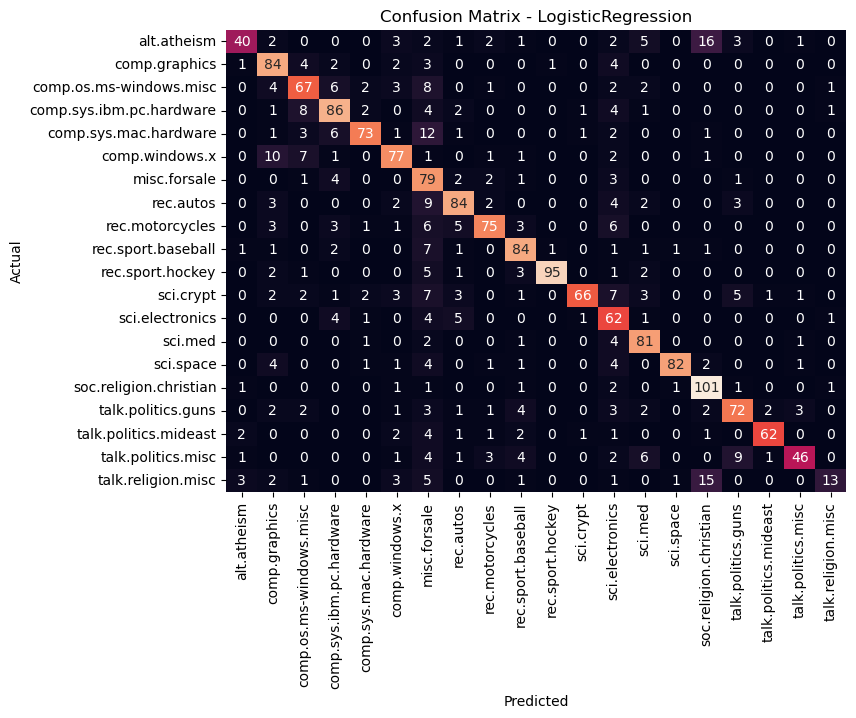

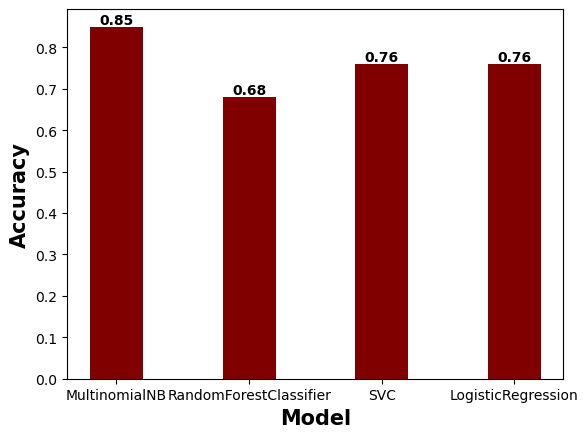

In [8]:
ma=0
bar_values=[]
bar_class=["MultinomialNB","RandomForestClassifier","SVC","LogisticRegression",]
classifi=None
for classifier in classifiers:
    # Create a pipeline with TF-IDF vectorizer and the current classifier
    model = make_pipeline(TfidfVectorizer(), classifier)
    
    # Train the model
    model.fit(train.data, train.target)

    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"\nClassifier: {classifier.__class__.__name__}")
    maxx=round(accuracy, 2)
    bar_values.append(maxx)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
    print("Classification Report:\n", classification_report(y_test, predictions))
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d',  cbar=False, xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.show()
    #getting best model train
    if(maxx>ma):
        ma=maxx
        classifi=classifier
    print("\n\n\n")
plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.bar(bar_class,bar_values,color ='maroon', width = 0.4)
# Annotating each bar with its value
for i, value in enumerate(bar_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')


In [10]:
# best algo model is trained aagain 
print(f"Best accuracy  model is {classifi}")
model = make_pipeline(TfidfVectorizer(), classifi)
    
    # Train the model
model.fit(X_train, y_train)

    # Make predictions on the test set
predictions = model.predict(X_test)
    
    # Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print(f"\nClassifier: {classifi}")
maxx=round(accuracy, 2)
print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
print("Classification Report:\n", classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)


Best accuracy  model is <__main__.MultinomialNaiveBayes object at 0x0000021FF3D7BA90>

Classifier: <__main__.MultinomialNaiveBayes object at 0x0000021FF3D7BA90>
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        78
           1       0.80      0.73      0.77       101
           2       0.79      0.64      0.71        96
           3       0.75      0.81      0.78       110
           4       0.86      0.73      0.79       101
           5       0.86      0.84      0.85       101
           6       0.86      0.71      0.78        93
           7       0.86      0.76      0.81       109
           8       0.93      0.80      0.86       103
           9       0.92      0.81      0.86       101
          10       0.94      0.94      0.94       110
          11       0.75      0.79      0.77       104
          12       0.51      0.73      0.60        79
          13       0.82      0.89      0.86

In [11]:
def predict_category(Enter_article, train=train, model=model):
    print(Enter_article)
    pred=model.predict([Enter_artical])
    return train.target_names[pred[0]]

In [12]:
iface=gr.Interface(fn=predict_category,inputs=gr.Textbox(lines=10, placeholder="Enter text here"),outputs="text", title="Text Classification",description="getting... the categories of Artical/news")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://31adb61e39b63f23c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# ALL ALGROTHIM

First few rows of the dataset:
["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n", 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra

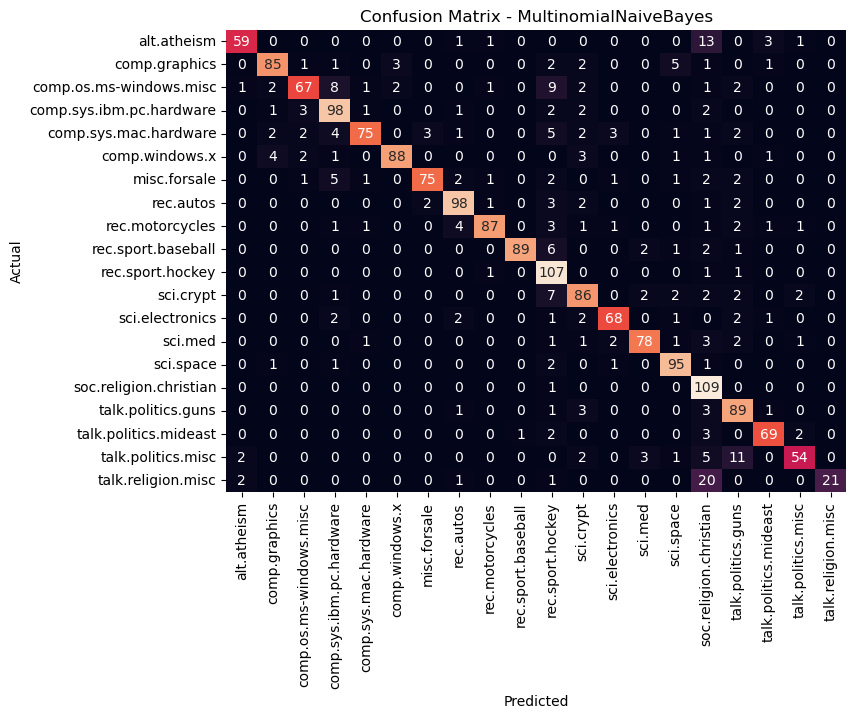






Classifier: RandomForestClassifier
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57        78
           1       0.54      0.83      0.65       101
           2       0.48      0.69      0.57        96
           3       0.67      0.75      0.70       110
           4       0.68      0.62      0.65       101
           5       0.66      0.78      0.72       101
           6       0.40      0.96      0.56        93
           7       0.74      0.65      0.69       109
           8       0.91      0.60      0.73       103
           9       0.77      0.75      0.76       101
          10       0.93      0.80      0.86       110
          11       0.88      0.63      0.74       104
          12       0.64      0.54      0.59        79
          13       0.81      0.74      0.77        90
          14       0.99      0.68      0.81       101
          15       0.66      0.92      0.77       110
  

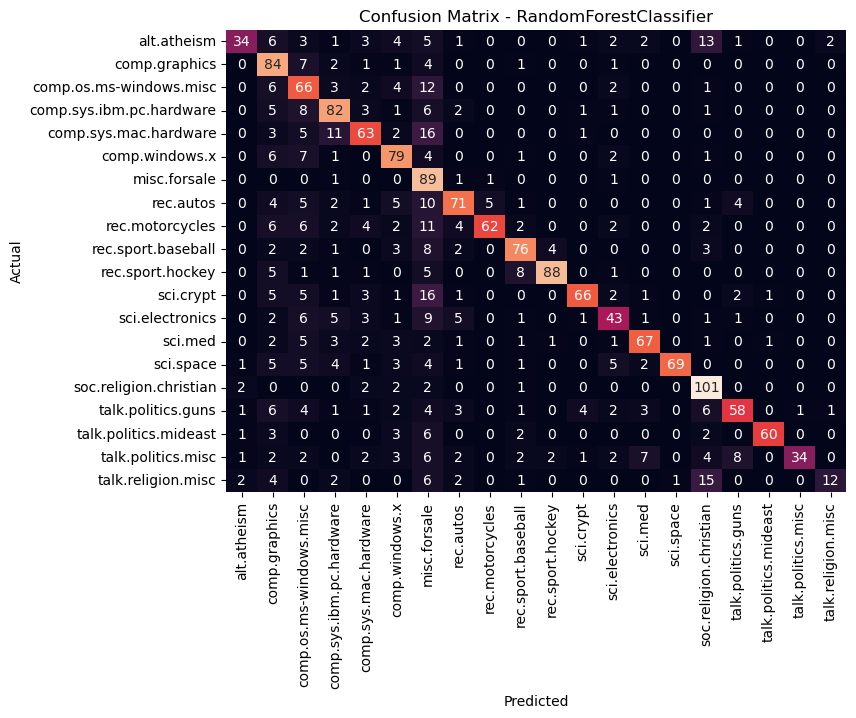






Classifier: SVC
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        78
           1       0.63      0.89      0.74       101
           2       0.82      0.72      0.77        96
           3       0.79      0.85      0.82       110
           4       0.87      0.67      0.76       101
           5       0.88      0.78      0.83       101
           6       0.46      0.89      0.60        93
           7       0.75      0.77      0.76       109
           8       0.92      0.71      0.80       103
           9       0.85      0.79      0.82       101
          10       1.00      0.82      0.90       110
          11       0.98      0.62      0.76       104
          12       0.39      0.90      0.54        79
          13       0.78      0.87      0.82        90
          14       0.98      0.78      0.87       101
          15       0.77      0.93      0.84       110
          16       0.

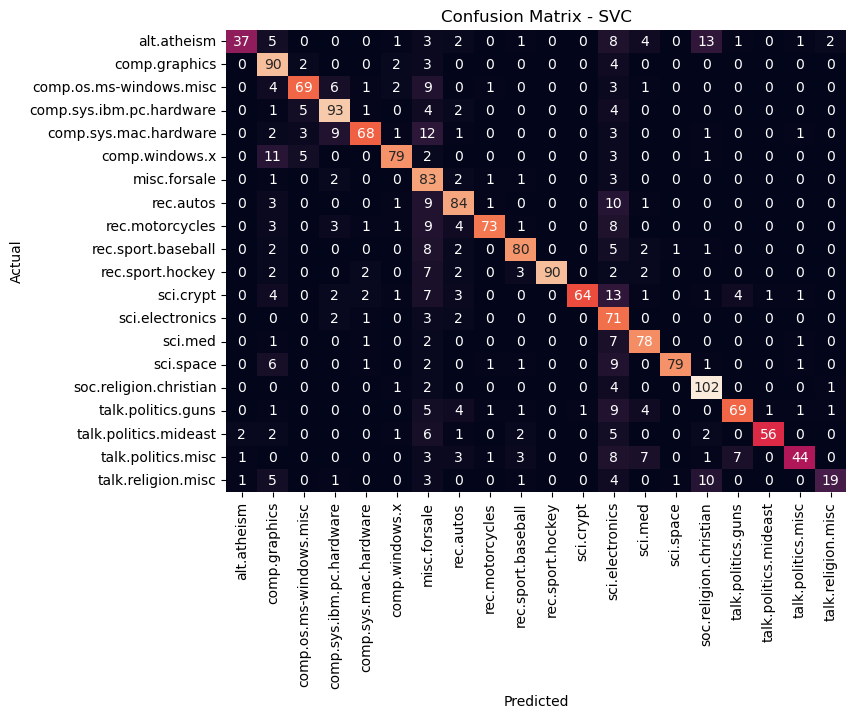






Classifier: LogisticRegression
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.51      0.63        78
           1       0.69      0.83      0.76       101
           2       0.70      0.70      0.70        96
           3       0.75      0.78      0.76       110
           4       0.88      0.72      0.79       101
           5       0.76      0.76      0.76       101
           6       0.46      0.85      0.60        93
           7       0.78      0.77      0.77       109
           8       0.84      0.73      0.78       103
           9       0.78      0.83      0.80       101
          10       0.98      0.86      0.92       110
          11       0.94      0.63      0.76       104
          12       0.53      0.78      0.63        79
          13       0.76      0.90      0.83        90
          14       0.96      0.81      0.88       101
          15       0.72      0.92      0.81       110
      

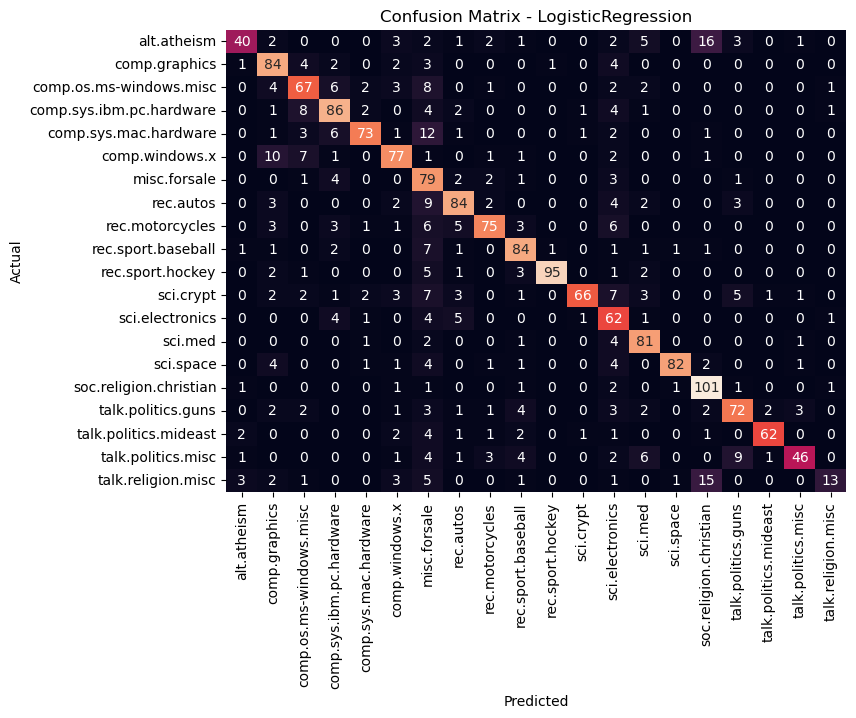





Best accuracy  model is <__main__.MultinomialNaiveBayes object at 0x00000204D5B31810>

Classifier: <__main__.MultinomialNaiveBayes object at 0x00000204D5B31810>
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83        78
           1       0.89      0.84      0.87       101
           2       0.88      0.70      0.78        96
           3       0.80      0.89      0.84       110
           4       0.94      0.74      0.83       101
           5       0.95      0.87      0.91       101
           6       0.94      0.81      0.87        93
           7       0.88      0.90      0.89       109
           8       0.95      0.84      0.89       103
           9       0.99      0.88      0.93       101
          10       0.69      0.97      0.81       110
          11       0.80      0.83      0.81       104
          12       0.89      0.86      0.88        79
          13       0.92      0.87      

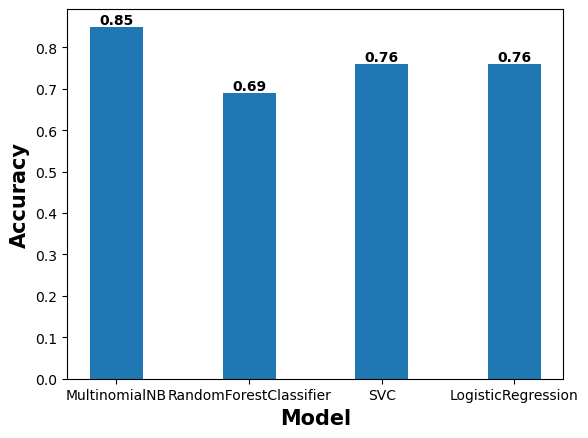

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import gradio as gr
# !pip install transformers //download it
# pip install --upgrade transformers// update it if you get error
# !pip install gradio // download it
# Fetch the 20 newsgroups dataset

data = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
print("First few rows of the dataset:")
print(data.data[:2])w
# Display information about the dataset
print("Number of samples:", len(data.data))
print("\nTarget names:", data.target_names)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1, random_state=1)
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'comp.windows.x','misc.forsale', 'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt' ,'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns','talk.politics.mideast', 'talk.politics.misc','talk.religion.misc']
# Training the data on these categories
train = fetch_20newsgroups (subset='train', categories=categories)
#MultinomialNaiveBayes functon
class MultinomialNaiveBayes:
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        num_features = X.shape[1]

        # Calculate class probabilities
        self.class_probs = np.zeros(num_classes)
        for i in range(num_classes):
            self.class_probs[i] = np.sum(y == i) / len(y)

        # Calculate feature probabilities
        self.feature_probs = np.zeros((num_classes, num_features))
        for i in range(num_classes):
            class_count = np.sum(y == i)
            self.feature_probs[i, :] = (np.sum(X[y == i], axis=0) + self.alpha) / (class_count + self.alpha * num_features)

    def predict(self, X):
        num_samples = X.shape[0]
        num_classes = len(self.class_probs)
        predictions = np.zeros(num_samples, dtype=int)

        for i in range(num_samples):
            # Ensure X[i] is a 2D array with a single row
            sample_probs = np.sum(np.log(self.feature_probs) * X[i, :].toarray(), axis=1) + np.log(self.class_probs)
            predictions[i] = np.argmax(sample_probs)

        return predictions
# Define a list of classifiers to try
classifiers = [
    MultinomialNaiveBayes(alpha=.01),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression()
]
ma=0
bar_values=[]
bar_class=["MultinomialNB","RandomForestClassifier","SVC","LogisticRegression",]
classifi=None
for classifier in classifiers:
    # Create a pipeline with TF-IDF vectorizer and the current classifier
    model = make_pipeline(TfidfVectorizer(), classifier)
    
    # Train the model
    model.fit(train.data, train.target)

    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"\nClassifier: {classifier.__class__.__name__}")
    maxx=round(accuracy, 2)
    bar_values.append(maxx)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
    print("Classification Report:\n", classification_report(y_test, predictions))
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d',  cbar=False, xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.show()
    #getting best model train
    if(maxx>ma):
        ma=maxx
        classifi=classifier
    print("\n\n\n")
plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.bar(bar_class,bar_values, width = 0.4)
# Annotating each bar with its value
for i, value in enumerate(bar_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
# best algo model is trained aagain 
print(f"Best accuracy  model is {classifi}")
model = make_pipeline(TfidfVectorizer(), classifi)
    
    # Train the model
model.fit(train.data, train.target)

    # Make predictions on the test set
predictions = model.predict(X_test)
    
    # Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print(f"\nClassifier: {classifi}")
maxx=round(accuracy, 2)
print(f"Accuracy: {accuracy:.2f}")
    
    # Display classification report
print("Classification Report:\n", classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
def predict_category(Enter_article, train=train, model=model):
    pred=model.predict([Enter_article])
    return train.target_names[pred[0]]
iface=gr.Interface(fn=predict_category,inputs=gr.Textbox(lines=10, placeholder="Enter text here"),outputs="text", title="Text Classification",description="getting... the categories of Artical/news")
iface.launch(inline=False,share=True)

In [ ]:
https://huggingface.co/spaces/roy705051/text_classification

# test data

In [ ]:
Astronomers recently discovered a new exoplanet with potential habitability, expanding our understanding of space's potential for life.


In [ ]:
.Guns, as tools of both protection and destruction, have held a significant place in human history and continue to shape contemporary societies. This article explores the multifaceted aspects of guns, ranging from their mechanical intricacies to the heated debates surrounding their ownership and the profound impact they have on communities.
